In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("MSCI_8_Country_MKT.xlsx",index_col=0,parse_dates=True)

In [3]:
data = data[data.index>dt.datetime(1995,1,31)]

In [4]:
data

,MXJP Index,MXCA Index,MXUS Index,MXFR Index,MXDE Index,MXIT Index,MXCH Index,MXGB Index,Mkt-RF
1995-02-28,805.0867,447.6522,460.1122,44.0100,46.0136,44.0200,331.8600,916.2060,4.01
1995-03-31,788.6465,471.4553,472.5716,46.3400,41.9925,42.1300,319.9900,959.4286,-2.31
1995-04-28,803.8932,464.8976,487.1176,47.8741,44.2815,45.9800,330.8480,983.8739,1.34
1995-05-31,759.2175,487.6432,506.6778,49.1141,46.2290,45.4191,356.9435,1019.1755,-4.04
1995-06-30,724.7557,498.4978,519.2685,48.0372,46.5781,44.0224,365.4089,1018.9525,0.86
...,...,...,...,...,...,...,...,...,...
2019-07-31,1371.4580,3719.4429,4541.9600,331.7791,279.8598,139.0196,2224.0892,5154.6643,8.41
2019-08-30,1327.2513,3721.8120,4462.9812,329.7288,274.6025,138.5922,2229.0880,4940.8094,3.40
2019-09-30,1408.2689,3794.7203,4542.3615,341.3470,284.1881,144.0659,2261.8568,5083.9729,1.10
2019-10-31,1476.9673,3761.1535,4641.2506,345.5992,294.1295,147.2118,2279.3780,4977.2009,3.96


In [5]:
Country_MKT = data.pct_change()
Country_MKT = Country_MKT.fillna(method='bfill')

In [6]:
Country_MKT

,MXJP Index,MXCA Index,MXUS Index,MXFR Index,MXDE Index,MXIT Index,MXCH Index,MXGB Index,Mkt-RF
1995-02-28,-0.020420,0.053173,0.027079,0.052943,-0.087389,-0.042935,-0.035768,0.047176,-1.576060
1995-03-31,-0.020420,0.053173,0.027079,0.052943,-0.087389,-0.042935,-0.035768,0.047176,-1.576060
1995-04-28,0.019333,-0.013909,0.030781,0.033105,0.054510,0.091384,0.033932,0.025479,-1.580087
1995-05-31,-0.055574,0.048926,0.040155,0.025901,0.043980,-0.012199,0.078875,0.035880,-4.014925
1995-06-30,-0.045391,0.022259,0.024850,-0.021926,0.007552,-0.030751,0.023716,-0.000219,-1.212871
...,...,...,...,...,...,...,...,...,...
2019-07-31,0.009171,-0.000439,0.015444,-0.001313,-0.012828,0.009425,0.008542,0.020615,-1.880628
2019-08-30,-0.032233,0.000637,-0.017389,-0.006180,-0.018785,-0.003074,0.002248,-0.041488,-0.595719
2019-09-30,0.061042,0.019589,0.017786,0.035236,0.034907,0.039495,0.014701,0.028976,-0.676471
2019-10-31,0.048782,-0.008846,0.021770,0.012457,0.034982,0.021837,0.007746,-0.021002,2.600000


In [76]:
class Path_Prediction():

  

    def __init__(self,P,z,alpha,w,v,n_p,className): #Methods
        self.R = [] # a list that will contain a sample of observed log-returns for a given asset at a given trading frequency
        self.P = P # a list that will contain positive integer numbers candidate values for the parameter n of the classifier being implemented
        self.z = z # an integer corresponding to the desired learning sample size, to be used by methods Classify and Update.
        self.alpha = alpha # the significance threshold for the application of the signed path dependence test
        self.w = w # an integer number corresponding to a retuning interval
        self.v = v # an integer number corresponding to a retraining interval
        self.className = className # MA or DMA
        self.countSinceTune = 0 # storing how many data points have been read since the last time the classifier was tuned
        self.countSinceTrain = 0 # storing how many data points have been read since the last time the classifier was trained
        self.n_p = n_p # an integer number corresponding to a test lookback horizon
    
    def Classify(self,r_t): #This is the only public method of the class. It should be called every time t a new data point has become available and returns either s(t + 1) or zero, which also can be taken as a trading decision
        self.R.append(r_t) # Append r(t) to the end of list self.R , r(t): the observed data point (log-return)

        if len(self.R) > self.z:
            print("r_t :",r_t)
            self.R.pop(0) # Drop the first element of list self.R
            print("First element is popped")
            print("self.R :",self.R)
      
        if len(self.R) == self.z:
            self.Update()
            #self.R.append(r_t)
            #print("self.R :",self.R)
            #print("bTrade : ",self.bTrade)
            if self.bTrade == True:
                #print("!!!!!!!!!!!!!!!!!!!!!!!!")
                #print("self.R",self.R)
                #print("self.r_",self.r_)
                #print("self.n_max :",self.n_max)
                return self.Predict(self.R,self.r_,self.n_max) # Return -1 or 1
            else:
                return 0    
    
    
    def Predict(self,R,r_,n):
        
        sum_ = 0
        #print("R:",R)
        #print("r_ : ",r_)
        #print("n : ",n)
        for i in range(n):
            #print("i:",i)
            sum_ += R[len(R)-1-i]-r_
            #print("sum_ : ",sum_)
        sign_sum = np.sign(sum_)
        #print("self.Ita : ",self.Ita)
        #print("sign_sum : ",sign_sum)
        #print("prediction : ",self.Ita*sign_sum)
        return self.Ita*sign_sum #return either -1 or 1
    
    def Null_hypothesis(self):

        w_t_sum = 0
        w_t_sum_sign = 0
        d_sum = 0
        W = [0]*len(self.R)
        #print("W:",W)
        D = [0]*len(self.R)
            
        for j in range(self.n_p,len(self.R)):
            for i in range(1,j+1): # sgn(r(t-1))+sgn(r(t-1)+r(t-2))+sgn(r(t-1)+r(t-2)+r(t-3))+....+sgn(r(t-1)+r(t-2)+r(t-3)+...+r(t-n+1)+r(t-n))
                w_t_sum += self.R[j-i]
                w_t_sum_sign += np.sign(w_t_sum)
                #print("j :",j)
                #print("w_t_sum_sign:",w_t_sum_sign)
            W[j] = w_t_sum_sign/self.n_p
                #print("W[j]:",W[j])
                #print("W:",W)
            D[j] = self.R[j]*W[j]
                #print("D[j]:",D[j])
                #print("D:",D)
                
        D_sum = 0
        for i in range(self.n_p,len(D)):
            D_sum += D[i]
        D_average = D_sum/(len(D)-self.n_p) # Hの分母
            
        sum = 0
        gamma_tau_sum = 0
        for j in range(-self.n_p,self.n_p+1):
            for i in range(self.n_p,len(self.R)-self.n_p):
                sum += (D[i]-D_average)*(D[i-abs(j)]-D_average)
            gamma_tau_sum += sum/(len(D)-self.n_p)
            
        H_down = np.sqrt(gamma_tau_sum)

        H_R = D_average / H_down
            
        #print("Null Hypothesis Working!!")
        print("H_R : ",H_R)
        print(" norm.ppf(1-self.alpha) : ",norm.ppf(1-self.alpha))

        return H_R
        
        
        
        
        
        
    def Update(self):
        
        print("--------------------------------------------------------------")
        print("Start Update")
        self.countSinceTune = self.countSinceTune +1
        self.countSinceTrain = self.countSinceTrain +1
        print("self.countSinceTune:",self.countSinceTune)
        print("self.countSinceTrain:",self.countSinceTrain)

        if self.countSinceTune == self.w: # The tuning stage is performed inside this block // In the paper w was 6 months
            self.r_ = sum(self.R[:self.z])/len(self.R[:self.z])

            if (self.className == "MA") & (self.Null_hypothesis() > norm.ppf(1-self.alpha)):
                print("Tuning Stage is working")
                self.bTrade = True
                self.Ita = 1
                print("Tuning Stage is Done")
               

            elif (self.className == "DMA") & (abs(self.Null_hypothesis()) > norm.ppf(1-self.alpha/2)):
                self.bTrade = True
                if self.Null_hypothesis() > norm.ppf(1-self.alpha/2):
                    self.Ita = 1
                if self.Null_hypothesis() < norm.ppf(self.alpha/2):
                    self.Ita = -1
                    
            else:
                self.bTrade = False
                self.Ita = 0
                print("bTrade is False")

            self.countSinceTune = 0

        if self.countSinceTrain == self.v: # The training stage is performed inside this block // In the paper v was one month
            print("Training Stage is working")
            r_1 = sum(self.R[:round(self.z/2)])/len(self.R[:round(self.z/2)])
            P_Classification_Gain = []
            for n in self.P:
                sum_classification = 0
                #print("n:",n)
                for i in range(round(self.z/2),self.z):
                    #print("round(self.z/2):",round(self.z/2))
                    #print("self.z:",self.z)
                    #print("i:",i)
                    sum_classification += np.exp(self.R[i]*self.Predict(self.R[i-round(self.z/2):i],r_1,n))
                P_Classification_Gain.append(sum_classification/(round(self.z/2))) ## Predict using R = ((r(t−1), r(t−2), ..., r(t−z/2)),r_,n)
            
            n_max_index = np.argmax(P_Classification_Gain) ## n_max that maximize the classification gain 
            n_max = P[n_max_index]
            print("n_max : ",n_max)
            self.n_max = n_max
            #print("self.n_max :",self.n_max)
            self.countSinceTrain = 0
            print("Training Stage is Done")
            print("---------------------------------------------------------")
            
            
            


In [110]:
P = np.random.randint(1,50,5)
R_1 = Country_MKT['MXJP Index']#[1:21]
print(R_1)
print("P :",P)

1995-02-28   -0.020420
1995-03-31   -0.020420
1995-04-28    0.019333
1995-05-31   -0.055574
1995-06-30   -0.045391
                ...   
2019-07-31    0.009171
2019-08-30   -0.032233
2019-09-30    0.061042
2019-10-31    0.048782
2019-11-29    0.018637
Name: MXJP Index, Length: 298, dtype: float64
P : [ 1 45  4 33 37]


In [111]:
z = 100
alpha = 0.6
w = 1
v = 1
n_p = 2
a_1 = Path_Prediction(P,z,1-alpha,w,v,n_p,'MA')

In [112]:
Prediction = []
k = pd.DataFrame(index=R_1.index[z:],columns=['Predicted Path'])
for i in R_1:
    Prediction.append(a_1.Classify(i))
Prediction = Prediction[z:]
for j in range(len(Prediction)):
    k[j:j+1] = Prediction[j]
    
        

--------------------------------------------------------------
Start Update
self.countSinceTune: 1
self.countSinceTrain: 1
H_R :  -0.07943417825136236
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.07943417825136236
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.0779860655124931
First element is popped
self.R : [-0.020420409379511506, 0.019332742870221464, -0.05557417328570513, -0.04539120871160096, 0.11891648454782766, 0.06740921134716205, 0.018186103146235144, -0.02204895228672432, 0.05129588154379916, 0.06757876012867503, 0.022415579510026706, -0.03411860448680448, 0.05489803224530054, 0.03615344815986399, -0.021607200369821333, 0.01966469068327803, -0.07097144429286639, -0.02830478782181256, 0.06351653341429309, -0.04775148498160309, 0.01914419652724586, -0.05088747178773789, -0.06835774032460784, 0.017009955876465144, -0.003883022625

H_R :  -0.0022094531260987023
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.08112276057420797
First element is popped
self.R : [0.06757876012867503, 0.022415579510026706, -0.03411860448680448, 0.05489803224530054, 0.03615344815986399, -0.021607200369821333, 0.01966469068327803, -0.07097144429286639, -0.02830478782181256, 0.06351653341429309, -0.04775148498160309, 0.01914419652724586, -0.05088747178773789, -0.06835774032460784, 0.017009955876465144, -0.0038830226258361744, 0.061676650150212176, 0.019095185480378918, 0.05497212193783274, 0.0027233041924537016, -0.0725499949753794, -0.009112525605275867, -0.09713508705072904, -0.004550629982417842, -0.039878400104342515, 0.061661911654346424, 0.0010722236890414738, -0.012069061520831537, -0.013773286117718442, -0.009530865357833984, 0.015201254708306688, 0.026057029165451606, -0.13412126069484898, -

n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.012245109140861854
First element is popped
self.R : [-0.07097144429286639, -0.02830478782181256, 0.06351653341429309, -0.04775148498160309, 0.01914419652724586, -0.05088747178773789, -0.06835774032460784, 0.017009955876465144, -0.0038830226258361744, 0.061676650150212176, 0.019095185480378918, 0.05497212193783274, 0.0027233041924537016, -0.0725499949753794, -0.009112525605275867, -0.09713508705072904, -0.004550629982417842, -0.039878400104342515, 0.061661911654346424, 0.0010722236890414738, -0.012069061520831537, -0.013773286117718442, -0.009530865357833984, 0.015201254708306688, 0.026057029165451606, -0.13412126069484898, -0.05941279934685462, -0.0010324273051900423, 0.10238256230196474, -0.04726032669084346, 0.03774970635030139, -0.0024888588554727864, 0.14104560369345798, 0.049412064998080485, -0.03764407898744704, 0.08747427903029537, 0.04237713252111153, -0.051691923922834726, 0.03

H_R :  -0.055477419814738874
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.055477419814738874
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.021682076387804283
First element is popped
self.R : [0.061676650150212176, 0.019095185480378918, 0.05497212193783274, 0.0027233041924537016, -0.0725499949753794, -0.009112525605275867, -0.09713508705072904, -0.004550629982417842, -0.039878400104342515, 0.061661911654346424, 0.0010722236890414738, -0.012069061520831537, -0.013773286117718442, -0.009530865357833984, 0.015201254708306688, 0.026057029165451606, -0.13412126069484898, -0.05941279934685462, -0.0010324273051900423, 0.10238256230196474, -0.04726032669084346, 0.03774970635030139, -0.0024888588554727864, 0.14104560369345798, 0.049412064998080485, -0.03764407898744704, 0.08747427903029537, 0.04237713252111153, -0.051691923922834726, 0.032399236

n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.04182704568155837
First element is popped
self.R : [-0.09713508705072904, -0.004550629982417842, -0.039878400104342515, 0.061661911654346424, 0.0010722236890414738, -0.012069061520831537, -0.013773286117718442, -0.009530865357833984, 0.015201254708306688, 0.026057029165451606, -0.13412126069484898, -0.05941279934685462, -0.0010324273051900423, 0.10238256230196474, -0.04726032669084346, 0.03774970635030139, -0.0024888588554727864, 0.14104560369345798, 0.049412064998080485, -0.03764407898744704, 0.08747427903029537, 0.04237713252111153, -0.051691923922834726, 0.03239923653412835, 0.021762635716331857, 0.02072218346621546, 0.06352565856793291, 0.00018045992418991297, -0.0006482720228421224, 0.013542532819549313, -0.02589717105967282, -0.054817714133267526, 0.0498726053969909, -0.08398561183858955, 0.03578437018886693, -0.03484497669509823, -0.048596262695230874, -0.028126623934228157, -0.03

bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.005989388768387061
First element is popped
self.R : [-0.13412126069484898, -0.05941279934685462, -0.0010324273051900423, 0.10238256230196474, -0.04726032669084346, 0.03774970635030139, -0.0024888588554727864, 0.14104560369345798, 0.049412064998080485, -0.03764407898744704, 0.08747427903029537, 0.04237713252111153, -0.051691923922834726, 0.03239923653412835, 0.021762635716331857, 0.02072218346621546, 0.06352565856793291, 0.00018045992418991297, -0.0006482720228421224, 0.013542532819549313, -0.02589717105967282, -0.054817714133267526, 0.0498726053969909, -0.08398561183858955, 0.03578437018886693, -0.03484497669509823, -0.048596262695230874, -0.028126623934228157, -0.032106062234995236, 0.006159116980818169, -0.03665836258104094, 0.03878831111778136, 0.0525458035467361, -0.04050208559538193, -0.012805020302831593, -0.07325102088734148, -0.070926996

H_R :  0.10602476846147946
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.037836146976287455
First element is popped
self.R : [0.049412064998080485, -0.03764407898744704, 0.08747427903029537, 0.04237713252111153, -0.051691923922834726, 0.03239923653412835, 0.021762635716331857, 0.02072218346621546, 0.06352565856793291, 0.00018045992418991297, -0.0006482720228421224, 0.013542532819549313, -0.02589717105967282, -0.054817714133267526, 0.0498726053969909, -0.08398561183858955, 0.03578437018886693, -0.03484497669509823, -0.048596262695230874, -0.028126623934228157, -0.032106062234995236, 0.006159116980818169, -0.03665836258104094, 0.03878831111778136, 0.0525458035467361, -0.04050208559538193, -0.012805020302831593, -0.07325102088734148, -0.0709269965231617, -0.09162255716972378, 0.02546233646368501, 0.01679377564203932, -0.007191079136690592, -0.05916

Training Stage is Done
---------------------------------------------------------
r_t : -0.0917570461175592
First element is popped
self.R : [0.021762635716331857, 0.02072218346621546, 0.06352565856793291, 0.00018045992418991297, -0.0006482720228421224, 0.013542532819549313, -0.02589717105967282, -0.054817714133267526, 0.0498726053969909, -0.08398561183858955, 0.03578437018886693, -0.03484497669509823, -0.048596262695230874, -0.028126623934228157, -0.032106062234995236, 0.006159116980818169, -0.03665836258104094, 0.03878831111778136, 0.0525458035467361, -0.04050208559538193, -0.012805020302831593, -0.07325102088734148, -0.0709269965231617, -0.09162255716972378, 0.02546233646368501, 0.01679377564203932, -0.007191079136690592, -0.059168506998963255, 0.04189389068415683, 0.047826914260090225, 0.02518127370555212, 0.026790349583438733, -0.08451252666438436, -0.07022380482105361, -0.020467171363250714, -0.018308919243882116, -0.06381329240115363, 0.04002120806186249, -0.05582002336900138, -0

 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.032851141967849884
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.06423623901216446
First element is popped
self.R : [0.013542532819549313, -0.02589717105967282, -0.054817714133267526, 0.0498726053969909, -0.08398561183858955, 0.03578437018886693, -0.03484497669509823, -0.048596262695230874, -0.028126623934228157, -0.032106062234995236, 0.006159116980818169, -0.03665836258104094, 0.03878831111778136, 0.0525458035467361, -0.04050208559538193, -0.012805020302831593, -0.07325102088734148, -0.0709269965231617, -0.09162255716972378, 0.02546233646368501, 0.01679377564203932, -0.007191079136690592, -0.059168506998963255, 0.04189389068415683, 0.047826914260090225, 0.02518127370555212, 0.026790349583438733, -0.08451252666438436, -0.07022380482105361, -0.020467171363250714, -0.018308919243882116, -0.0

H_R :  0.07144296826786777
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  0.07144296826786777
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.04346253735474537
First element is popped
self.R : [0.03578437018886693, -0.03484497669509823, -0.048596262695230874, -0.028126623934228157, -0.032106062234995236, 0.006159116980818169, -0.03665836258104094, 0.03878831111778136, 0.0525458035467361, -0.04050208559538193, -0.012805020302831593, -0.07325102088734148, -0.0709269965231617, -0.09162255716972378, 0.02546233646368501, 0.01679377564203932, -0.007191079136690592, -0.059168506998963255, 0.04189389068415683, 0.047826914260090225, 0.02518127370555212, 0.026790349583438733, -0.08451252666438436, -0.07022380482105361, -0.020467171363250714, -0.018308919243882116, -0.06381329240115363, 0.04002120806186249, -0.05582002336900138, -0.03024936199654893, -

H_R :  0.02518186905439759
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.06965496004653193
First element is popped
self.R : [-0.03665836258104094, 0.03878831111778136, 0.0525458035467361, -0.04050208559538193, -0.012805020302831593, -0.07325102088734148, -0.0709269965231617, -0.09162255716972378, 0.02546233646368501, 0.01679377564203932, -0.007191079136690592, -0.059168506998963255, 0.04189389068415683, 0.047826914260090225, 0.02518127370555212, 0.026790349583438733, -0.08451252666438436, -0.07022380482105361, -0.020467171363250714, -0.018308919243882116, -0.06381329240115363, 0.04002120806186249, -0.05582002336900138, -0.03024936199654893, -0.008467433949606584, -0.040713244133662174, -0.0021983624777782707, 0.05115200398253239, 0.0779860655124931, 0.04465927344555487, 0.06995475998001255, 0.014745276149185749, 0.02904184443015745, -0.0346050810

H_R :  -0.04295871884950249
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.08910409353995452
First element is popped
self.R : [-0.09162255716972378, 0.02546233646368501, 0.01679377564203932, -0.007191079136690592, -0.059168506998963255, 0.04189389068415683, 0.047826914260090225, 0.02518127370555212, 0.026790349583438733, -0.08451252666438436, -0.07022380482105361, -0.020467171363250714, -0.018308919243882116, -0.06381329240115363, 0.04002120806186249, -0.05582002336900138, -0.03024936199654893, -0.008467433949606584, -0.040713244133662174, -0.0021983624777782707, 0.05115200398253239, 0.0779860655124931, 0.04465927344555487, 0.06995475998001255, 0.014745276149185749, 0.02904184443015745, -0.034605081088279754, 0.046447457443149265, 0.005555764001934804, 0.029200843879911398, 0.08112276057420797, 0.0030307499150967754, -0.03404338427106868, 0.040381

--------------------------------------------------------------
Start Update
self.countSinceTune: 1
self.countSinceTrain: 1
H_R :  -0.04013651350988846
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.04013651350988846
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.10997097144400203
First element is popped
self.R : [0.04189389068415683, 0.047826914260090225, 0.02518127370555212, 0.026790349583438733, -0.08451252666438436, -0.07022380482105361, -0.020467171363250714, -0.018308919243882116, -0.06381329240115363, 0.04002120806186249, -0.05582002336900138, -0.03024936199654893, -0.008467433949606584, -0.040713244133662174, -0.0021983624777782707, 0.05115200398253239, 0.0779860655124931, 0.04465927344555487, 0.06995475998001255, 0.014745276149185749, 0.02904184443015745, -0.034605081088279754, 0.046447457443149265, 0.005555764001934804, 0.029200

H_R :  -0.08878068484277044
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.08878068484277044
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.041145034958404825
First element is popped
self.R : [-0.08451252666438436, -0.07022380482105361, -0.020467171363250714, -0.018308919243882116, -0.06381329240115363, 0.04002120806186249, -0.05582002336900138, -0.03024936199654893, -0.008467433949606584, -0.040713244133662174, -0.0021983624777782707, 0.05115200398253239, 0.0779860655124931, 0.04465927344555487, 0.06995475998001255, 0.014745276149185749, 0.02904184443015745, -0.034605081088279754, 0.046447457443149265, 0.005555764001934804, 0.029200843879911398, 0.08112276057420797, 0.0030307499150967754, -0.03404338427106868, 0.04038163999306166, -0.039094783144930756, -0.008190622796917069, -0.017954720663313495, -0.012245109140861854, 0.01460079971911

 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.028377887939448745
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.011404727186629104
First element is popped
self.R : [-0.06381329240115363, 0.04002120806186249, -0.05582002336900138, -0.03024936199654893, -0.008467433949606584, -0.040713244133662174, -0.0021983624777782707, 0.05115200398253239, 0.0779860655124931, 0.04465927344555487, 0.06995475998001255, 0.014745276149185749, 0.02904184443015745, -0.034605081088279754, 0.046447457443149265, 0.005555764001934804, 0.029200843879911398, 0.08112276057420797, 0.0030307499150967754, -0.03404338427106868, 0.04038163999306166, -0.039094783144930756, -0.008190622796917069, -0.017954720663313495, -0.012245109140861854, 0.014600799719115987, 0.04802637173747737, -0.01383013794857979, 0.028805418043662545, 0.005534200161836589, -0.04439585644650257, 0.

H_R :  -0.02946317404737867
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.02946317404737867
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.015323124001190402
First element is popped
self.R : [-0.008467433949606584, -0.040713244133662174, -0.0021983624777782707, 0.05115200398253239, 0.0779860655124931, 0.04465927344555487, 0.06995475998001255, 0.014745276149185749, 0.02904184443015745, -0.034605081088279754, 0.046447457443149265, 0.005555764001934804, 0.029200843879911398, 0.08112276057420797, 0.0030307499150967754, -0.03404338427106868, 0.04038163999306166, -0.039094783144930756, -0.008190622796917069, -0.017954720663313495, -0.012245109140861854, 0.014600799719115987, 0.04802637173747737, -0.01383013794857979, 0.028805418043662545, 0.005534200161836589, -0.04439585644650257, 0.017751706111253984, 0.02715562346231959, 0.0216820763878042

H_R :  -0.049638922143870945
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.04903969270166453
First element is popped
self.R : [0.06995475998001255, 0.014745276149185749, 0.02904184443015745, -0.034605081088279754, 0.046447457443149265, 0.005555764001934804, 0.029200843879911398, 0.08112276057420797, 0.0030307499150967754, -0.03404338427106868, 0.04038163999306166, -0.039094783144930756, -0.008190622796917069, -0.017954720663313495, -0.012245109140861854, 0.014600799719115987, 0.04802637173747737, -0.01383013794857979, 0.028805418043662545, 0.005534200161836589, -0.04439585644650257, 0.017751706111253984, 0.02715562346231959, 0.021682076387804283, 0.06046606650441588, 0.12555623453654974, 0.014599866226417957, 0.07171480494923466, 0.07107749032322119, 0.04182704568155837, -0.01900457420931334, 0.0454497075919571, -0.00422025699702433, -0.07954612

--------------------------------------------------------------
Start Update
self.countSinceTune: 1
self.countSinceTrain: 1
H_R :  -0.025482112210099616
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.025482112210099616
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.031447252698022066
First element is popped
self.R : [0.046447457443149265, 0.005555764001934804, 0.029200843879911398, 0.08112276057420797, 0.0030307499150967754, -0.03404338427106868, 0.04038163999306166, -0.039094783144930756, -0.008190622796917069, -0.017954720663313495, -0.012245109140861854, 0.014600799719115987, 0.04802637173747737, -0.01383013794857979, 0.028805418043662545, 0.005534200161836589, -0.04439585644650257, 0.017751706111253984, 0.02715562346231959, 0.021682076387804283, 0.06046606650441588, 0.12555623453654974, 0.014599866226417957, 0.07171480494923466, 0.0710

H_R :  -0.04592545048861805
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.04592545048861805
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.004716523934819139
First element is popped
self.R : [-0.03404338427106868, 0.04038163999306166, -0.039094783144930756, -0.008190622796917069, -0.017954720663313495, -0.012245109140861854, 0.014600799719115987, 0.04802637173747737, -0.01383013794857979, 0.028805418043662545, 0.005534200161836589, -0.04439585644650257, 0.017751706111253984, 0.02715562346231959, 0.021682076387804283, 0.06046606650441588, 0.12555623453654974, 0.014599866226417957, 0.07171480494923466, 0.07107749032322119, 0.04182704568155837, -0.01900457420931334, 0.0454497075919571, -0.00422025699702433, -0.07954612365854785, 0.008371663437413135, -0.004498077710972437, 0.04029740077343691, -0.009146711756020554, 0.009543023288857366, -

bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.10410072514478941
First element is popped
self.R : [-0.017954720663313495, -0.012245109140861854, 0.014600799719115987, 0.04802637173747737, -0.01383013794857979, 0.028805418043662545, 0.005534200161836589, -0.04439585644650257, 0.017751706111253984, 0.02715562346231959, 0.021682076387804283, 0.06046606650441588, 0.12555623453654974, 0.014599866226417957, 0.07171480494923466, 0.07107749032322119, 0.04182704568155837, -0.01900457420931334, 0.0454497075919571, -0.00422025699702433, -0.07954612365854785, 0.008371663437413135, -0.004498077710972437, 0.04029740077343691, -0.009146711756020554, 0.009543023288857366, -0.005989388768387061, 0.05595697690325285, 0.023708512499055256, 0.01894615147855072, -0.01564357308609743, -0.007904172025699152, 0.035764759748137864, 0.011218636444979557, -0.037836146976287455, -0.05506942783861424, 0.01570834128478449

bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.02262404924036643
First element is popped
self.R : [0.028805418043662545, 0.005534200161836589, -0.04439585644650257, 0.017751706111253984, 0.02715562346231959, 0.021682076387804283, 0.06046606650441588, 0.12555623453654974, 0.014599866226417957, 0.07171480494923466, 0.07107749032322119, 0.04182704568155837, -0.01900457420931334, 0.0454497075919571, -0.00422025699702433, -0.07954612365854785, 0.008371663437413135, -0.004498077710972437, 0.04029740077343691, -0.009146711756020554, 0.009543023288857366, -0.005989388768387061, 0.05595697690325285, 0.023708512499055256, 0.01894615147855072, -0.01564357308609743, -0.007904172025699152, 0.035764759748137864, 0.011218636444979557, -0.037836146976287455, -0.05506942783861424, 0.01570834128478449, -0.0015183409529104797, -0.05559468388685451, -0.032646702954454154, -0.0917570461175592, -0.014157213505280

H_R :  0.04263670784273881
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  0.04263670784273881
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.08500407275092225
First element is popped
self.R : [0.02715562346231959, 0.021682076387804283, 0.06046606650441588, 0.12555623453654974, 0.014599866226417957, 0.07171480494923466, 0.07107749032322119, 0.04182704568155837, -0.01900457420931334, 0.0454497075919571, -0.00422025699702433, -0.07954612365854785, 0.008371663437413135, -0.004498077710972437, 0.04029740077343691, -0.009146711756020554, 0.009543023288857366, -0.005989388768387061, 0.05595697690325285, 0.023708512499055256, 0.01894615147855072, -0.01564357308609743, -0.007904172025699152, 0.035764759748137864, 0.011218636444979557, -0.037836146976287455, -0.05506942783861424, 0.01570834128478449, -0.0015183409529104797, -0.05559468388685451, -0.03

H_R :  -0.08892863746208446
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.08892863746208446
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.0015681811442080917
First element is popped
self.R : [0.07107749032322119, 0.04182704568155837, -0.01900457420931334, 0.0454497075919571, -0.00422025699702433, -0.07954612365854785, 0.008371663437413135, -0.004498077710972437, 0.04029740077343691, -0.009146711756020554, 0.009543023288857366, -0.005989388768387061, 0.05595697690325285, 0.023708512499055256, 0.01894615147855072, -0.01564357308609743, -0.007904172025699152, 0.035764759748137864, 0.011218636444979557, -0.037836146976287455, -0.05506942783861424, 0.01570834128478449, -0.0015183409529104797, -0.05559468388685451, -0.032646702954454154, -0.0917570461175592, -0.01415721350528032, -0.08177174730836256, 0.1260958315623153, 0.03538609213788657,

H_R :  -0.08819583307982692
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.020983411427929477
First element is popped
self.R : [-0.00422025699702433, -0.07954612365854785, 0.008371663437413135, -0.004498077710972437, 0.04029740077343691, -0.009146711756020554, 0.009543023288857366, -0.005989388768387061, 0.05595697690325285, 0.023708512499055256, 0.01894615147855072, -0.01564357308609743, -0.007904172025699152, 0.035764759748137864, 0.011218636444979557, -0.037836146976287455, -0.05506942783861424, 0.01570834128478449, -0.0015183409529104797, -0.05559468388685451, -0.032646702954454154, -0.0917570461175592, -0.01415721350528032, -0.08177174730836256, 0.1260958315623153, 0.03538609213788657, -0.06423623901216446, -0.015126035523628678, -0.035873128102932195, -0.1310453159916578, -0.2105761951882842, -0.04346253735474537, 0.029184914106836768, -0.07

H_R :  -0.12256045107956673
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.12256045107956673
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.004001497636542228
First element is popped
self.R : [-0.009146711756020554, 0.009543023288857366, -0.005989388768387061, 0.05595697690325285, 0.023708512499055256, 0.01894615147855072, -0.01564357308609743, -0.007904172025699152, 0.035764759748137864, 0.011218636444979557, -0.037836146976287455, -0.05506942783861424, 0.01570834128478449, -0.0015183409529104797, -0.05559468388685451, -0.032646702954454154, -0.0917570461175592, -0.01415721350528032, -0.08177174730836256, 0.1260958315623153, 0.03538609213788657, -0.06423623901216446, -0.015126035523628678, -0.035873128102932195, -0.1310453159916578, -0.2105761951882842, -0.04346253735474537, 0.029184914106836768, -0.07659356492156977, -0.045408453839399

H_R :  -0.13206987852019336
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.032945735357678085
First element is popped
self.R : [0.023708512499055256, 0.01894615147855072, -0.01564357308609743, -0.007904172025699152, 0.035764759748137864, 0.011218636444979557, -0.037836146976287455, -0.05506942783861424, 0.01570834128478449, -0.0015183409529104797, -0.05559468388685451, -0.032646702954454154, -0.0917570461175592, -0.01415721350528032, -0.08177174730836256, 0.1260958315623153, 0.03538609213788657, -0.06423623901216446, -0.015126035523628678, -0.035873128102932195, -0.1310453159916578, -0.2105761951882842, -0.04346253735474537, 0.029184914106836768, -0.07659356492156977, -0.04540845383939951, 0.03192692423632515, 0.09204276723443194, 0.06965496004653193, 0.028917807512649052, 0.028530629942517427, 0.012845632016548869, -0.05126344532799665, -0.014290

H_R :  -0.09876572141568239
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.02080589244650921
First element is popped
self.R : [0.01570834128478449, -0.0015183409529104797, -0.05559468388685451, -0.032646702954454154, -0.0917570461175592, -0.01415721350528032, -0.08177174730836256, 0.1260958315623153, 0.03538609213788657, -0.06423623901216446, -0.015126035523628678, -0.035873128102932195, -0.1310453159916578, -0.2105761951882842, -0.04346253735474537, 0.029184914106836768, -0.07659356492156977, -0.04540845383939951, 0.03192692423632515, 0.09204276723443194, 0.06965496004653193, 0.028917807512649052, 0.028530629942517427, 0.012845632016548869, -0.05126344532799665, -0.014290869982821919, -0.05796185579319302, 0.08910409353995452, -0.007763134945744765, -0.008749551183929505, 0.10485861837522359, 0.004135582580458985, -0.10997097144400203, -0.047068

H_R :  -0.059029105171621445
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.059029105171621445
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.025978135245084744
First element is popped
self.R : [-0.01415721350528032, -0.08177174730836256, 0.1260958315623153, 0.03538609213788657, -0.06423623901216446, -0.015126035523628678, -0.035873128102932195, -0.1310453159916578, -0.2105761951882842, -0.04346253735474537, 0.029184914106836768, -0.07659356492156977, -0.04540845383939951, 0.03192692423632515, 0.09204276723443194, 0.06965496004653193, 0.028917807512649052, 0.028530629942517427, 0.012845632016548869, -0.05126344532799665, -0.014290869982821919, -0.05796185579319302, 0.08910409353995452, -0.007763134945744765, -0.008749551183929505, 0.10485861837522359, 0.004135582580458985, -0.10997097144400203, -0.04706883764832792, 0.01387575465455737, -

self.R : [-0.015126035523628678, -0.035873128102932195, -0.1310453159916578, -0.2105761951882842, -0.04346253735474537, 0.029184914106836768, -0.07659356492156977, -0.04540845383939951, 0.03192692423632515, 0.09204276723443194, 0.06965496004653193, 0.028917807512649052, 0.028530629942517427, 0.012845632016548869, -0.05126344532799665, -0.014290869982821919, -0.05796185579319302, 0.08910409353995452, -0.007763134945744765, -0.008749551183929505, 0.10485861837522359, 0.004135582580458985, -0.10997097144400203, -0.04706883764832792, 0.01387575465455737, -0.053192311041193374, 0.041145034958404825, -0.016063713621423448, 0.06165844233610018, 0.04210623915700662, 0.011404727186629104, 0.045606753196120176, -0.08038596757990857, -0.017466678844746064, -0.015323124001190402, 0.009080871594025375, -0.01068176394576592, -0.08981624843438252, -0.007186435356916321, 0.009068701582935157, -0.04903969270166453, -0.000566883342884239, 0.03583594633704412, 0.11507648266002724, 0.031447252698022066, -

H_R :  0.08524469935263435
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.010825305186821899
First element is popped
self.R : [-0.07659356492156977, -0.04540845383939951, 0.03192692423632515, 0.09204276723443194, 0.06965496004653193, 0.028917807512649052, 0.028530629942517427, 0.012845632016548869, -0.05126344532799665, -0.014290869982821919, -0.05796185579319302, 0.08910409353995452, -0.007763134945744765, -0.008749551183929505, 0.10485861837522359, 0.004135582580458985, -0.10997097144400203, -0.04706883764832792, 0.01387575465455737, -0.053192311041193374, 0.041145034958404825, -0.016063713621423448, 0.06165844233610018, 0.04210623915700662, 0.011404727186629104, 0.045606753196120176, -0.08038596757990857, -0.017466678844746064, -0.015323124001190402, 0.009080871594025375, -0.01068176394576592, -0.08981624843438252, -0.007186435356916321, 0.0090

H_R :  0.09845391961119355
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.04437351983087745
First element is popped
self.R : [0.028917807512649052, 0.028530629942517427, 0.012845632016548869, -0.05126344532799665, -0.014290869982821919, -0.05796185579319302, 0.08910409353995452, -0.007763134945744765, -0.008749551183929505, 0.10485861837522359, 0.004135582580458985, -0.10997097144400203, -0.04706883764832792, 0.01387575465455737, -0.053192311041193374, 0.041145034958404825, -0.016063713621423448, 0.06165844233610018, 0.04210623915700662, 0.011404727186629104, 0.045606753196120176, -0.08038596757990857, -0.017466678844746064, -0.015323124001190402, 0.009080871594025375, -0.01068176394576592, -0.08981624843438252, -0.007186435356916321, 0.009068701582935157, -0.04903969270166453, -0.000566883342884239, 0.03583594633704412, 0.11507648266002724, 0.031

H_R :  -0.018435056868420212
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  -0.018435056868420212
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.013387588710556786
First element is popped
self.R : [-0.014290869982821919, -0.05796185579319302, 0.08910409353995452, -0.007763134945744765, -0.008749551183929505, 0.10485861837522359, 0.004135582580458985, -0.10997097144400203, -0.04706883764832792, 0.01387575465455737, -0.053192311041193374, 0.041145034958404825, -0.016063713621423448, 0.06165844233610018, 0.04210623915700662, 0.011404727186629104, 0.045606753196120176, -0.08038596757990857, -0.017466678844746064, -0.015323124001190402, 0.009080871594025375, -0.01068176394576592, -0.08981624843438252, -0.007186435356916321, 0.009068701582935157, -0.04903969270166453, -0.000566883342884239, 0.03583594633704412, 0.11507648266002724, 0.0314472526980

H_R :  0.02252062959128903
 norm.ppf(1-self.alpha) :  0.2533471031357997
H_R :  0.02252062959128903
 norm.ppf(1-self.alpha) :  0.2533471031357997
bTrade is False
Training Stage is working
n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.01750872210053578
First element is popped
self.R : [-0.008749551183929505, 0.10485861837522359, 0.004135582580458985, -0.10997097144400203, -0.04706883764832792, 0.01387575465455737, -0.053192311041193374, 0.041145034958404825, -0.016063713621423448, 0.06165844233610018, 0.04210623915700662, 0.011404727186629104, 0.045606753196120176, -0.08038596757990857, -0.017466678844746064, -0.015323124001190402, 0.009080871594025375, -0.01068176394576592, -0.08981624843438252, -0.007186435356916321, 0.009068701582935157, -0.04903969270166453, -0.000566883342884239, 0.03583594633704412, 0.11507648266002724, 0.031447252698022066, -0.06078888573927943, -0.10587585091413232, 0.06996123981769387, -0.044544753121755654

n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : -0.09802404334515435
First element is popped
self.R : [0.041145034958404825, -0.016063713621423448, 0.06165844233610018, 0.04210623915700662, 0.011404727186629104, 0.045606753196120176, -0.08038596757990857, -0.017466678844746064, -0.015323124001190402, 0.009080871594025375, -0.01068176394576592, -0.08981624843438252, -0.007186435356916321, 0.009068701582935157, -0.04903969270166453, -0.000566883342884239, 0.03583594633704412, 0.11507648266002724, 0.031447252698022066, -0.06078888573927943, -0.10587585091413232, 0.06996123981769387, -0.044544753121755654, -0.004716523934819139, 0.017395197271789398, 0.008245950786911704, 0.05622196113520572, 0.10410072514478941, 0.09421754284262485, 0.03793411354507703, 0.07057230069919695, 0.1266174665788975, -0.02262404924036643, 0.0010408260858234542, -0.0038903064630106954, -0.023899395372883214, 0.08500407275092225, -0.0003227979846691653, 0.058414076

n_max :  1
Training Stage is Done
---------------------------------------------------------
r_t : 0.009171490087520828
First element is popped
self.R : [-0.017466678844746064, -0.015323124001190402, 0.009080871594025375, -0.01068176394576592, -0.08981624843438252, -0.007186435356916321, 0.009068701582935157, -0.04903969270166453, -0.000566883342884239, 0.03583594633704412, 0.11507648266002724, 0.031447252698022066, -0.06078888573927943, -0.10587585091413232, 0.06996123981769387, -0.044544753121755654, -0.004716523934819139, 0.017395197271789398, 0.008245950786911704, 0.05622196113520572, 0.10410072514478941, 0.09421754284262485, 0.03793411354507703, 0.07057230069919695, 0.1266174665788975, -0.02262404924036643, 0.0010408260858234542, -0.0038903064630106954, -0.023899395372883214, 0.08500407275092225, -0.0003227979846691653, 0.05841407646906793, 0.03511862136395494, -0.06711356729612505, -0.0045862568764178935, -0.0015681811442080917, -0.033815687125681615, 0.0354881624256882, 0.0478842

In [113]:
print("Prediction :",Prediction)
print("len(Prediction) :",len(Prediction))

Prediction : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len(Prediction) : 198


In [82]:
  def index(dataset):
    dataset_index = dataset.copy()
    dataset_index.iloc[0] = 100*(dataset.iloc[0]+1)
    for i in range(1,len(dataset_index)) :
        dataset_index.iloc[i]=(dataset_index.iloc[i]+1)*dataset_index.iloc[i-1]
    return dataset_index

Text(0.5, 1.0, 'Predicted Path')

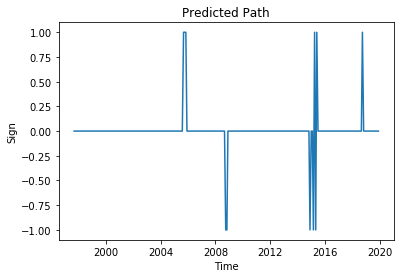

In [96]:
k["Actual Return"] = R_1[z:]
k["Expected Return"] = k['Predicted Path']*k['Actual Return']
k["Expected Return Index"]= k["Expected Return"].copy()
k["Expected Return"] = k["Actual Return"].copy()
plt.plot(k["Predicted Path"])
plt.xlabel("Time")
plt.ylabel("Sign")
plt.title("Predicted Path")

Text(0.5, 1.0, 'MXJP Index')

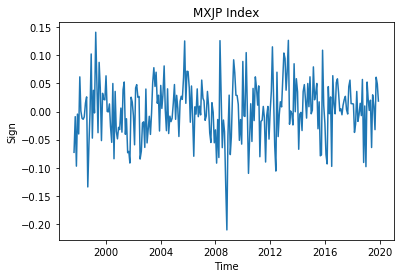

In [97]:
plt.plot(R_1[z:])
plt.xlabel("Time")
plt.ylabel("Sign")
plt.title("MXJP Index")

Text(0, 0.5, 'Return')

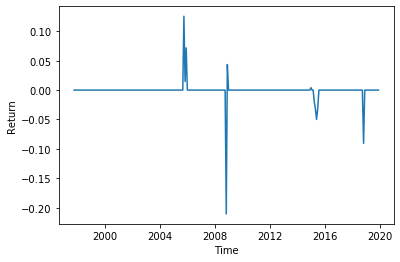

In [109]:
plt.plot(k['Expected Return']*k["Predicted Path"].shift(1))
plt.xlabel("Time")
plt.ylabel("Return")

,Predicted Path,Actual Return,Expected Return,Expected Return Index,Actual Return Index
1997-08-29,0,-0.072550,-0.07255,92.745,92.745001
1997-09-30,0,-0.009113,-0.00911253,91.8999,91.899859
1997-10-31,0,-0.097135,-0.0971351,82.9732,82.973158
1997-11-28,0,-0.004551,-0.00455063,82.5956,82.595578
1997-12-31,0,-0.039878,-0.0398784,79.3018,79.301799
...,...,...,...,...,...
2019-07-31,0,0.009171,0.00917149,194.091,137.821124
2019-08-30,0,-0.032233,-0.0322334,187.835,133.378686
2019-09-30,0,0.061042,0.0610416,199.301,141.520340
2019-10-31,0,0.048782,0.0487822,209.023,148.424008


In [102]:
k["Actual Return Index"] = index(k["Actual Return"])
k["Expected Return"][k["Predicted Path"] != 0] = k["Predicted Path"][k["Predicted Path"] != 0]*k["Expected Return"][k["Predicted Path"] != 0]

/Users/seungjuseo/.pyenv/versions/3.7.1/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
k

,Predicted Path,Actual Return,Expected Return,Expected Return Index,Actual Return Index
1997-08-29,0,-0.072550,-0.07255,-0,92.745001
1997-09-30,0,-0.009113,-0.00911253,-0,91.899859
1997-10-31,0,-0.097135,-0.0971351,-0,82.973158
1997-11-28,0,-0.004551,-0.00455063,-0,82.595578
1997-12-31,0,-0.039878,-0.0398784,-0,79.301799
...,...,...,...,...,...
2019-07-31,0,0.009171,0.00917149,0,137.821124
2019-08-30,0,-0.032233,-0.0322334,-0,133.378686
2019-09-30,0,0.061042,0.0610416,0,141.520340
2019-10-31,0,0.048782,0.0487822,0,148.424008


In [104]:
k["Expected Return Index"] = index(k["Expected Return"])
k[k["Expected Return Index"]>120].head(20)

,Predicted Path,Actual Return,Expected Return,Expected Return Index,Actual Return Index
2007-01-31,0,0.023709,0.0237085,122.372,122.371581
2007-02-28,0,0.018946,0.0189462,124.69,124.690051
2007-03-30,0,-0.015644,-0.0156436,122.739,122.739453
2007-04-30,0,-0.007904,-0.00790417,121.769,121.769300
2007-05-31,0,0.035765,0.0357648,126.124,126.124349
2007-06-29,0,0.011219,0.0112186,127.539,127.539293
2007-07-31,0,-0.037836,-0.0378361,122.714,122.713697
2008-10-31,-1,-0.210576,0.210576,125.296,62.772877
2008-12-31,0,0.029185,0.0291849,123.348,61.797005
2009-04-30,0,0.092043,0.0920428,122.527,61.385599


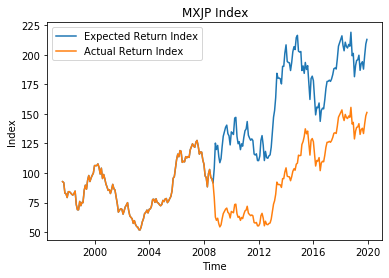

In [105]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(k["Expected Return Index"], label="Expected Return Index")
ax.plot(k["Actual Return Index"], label="Actual Return Index")
ax.set_xlabel("Time")
ax.set_ylabel("Index")
ax.set_title("MXJP Index")
ax.legend()
plt.show()

In [70]:
num = len(k[k["Predicted Path"] != 0])
a_1 = k["Predicted Path"][k["Predicted Path"] != 0]
a_2 = np.sign(k["Actual Return"][k["Predicted Path"] != 0])
Accuracy = np.sum(a_1 * a_2)/num
Accuracy

0.45454545454545453

In [71]:
a_1

2005-08-31    1
2005-09-30    1
2005-10-31   -1
2008-09-30   -1
2008-10-31   -1
2014-11-28   -1
2015-02-27    1
2015-03-31   -1
2015-04-30    1
2015-05-29    1
2018-09-28    1
Name: Predicted Path, dtype: object

In [72]:
a_2

2005-08-31    1.0
2005-09-30    1.0
2005-10-31    1.0
2008-09-30   -1.0
2008-10-31   -1.0
2014-11-28    1.0
2015-02-27    1.0
2015-03-31    1.0
2015-04-30    1.0
2015-05-29    1.0
2018-09-28    1.0
Name: Actual Return, dtype: float64

In [121]:
abs(-3)

3

In [67]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = norm.ppf(x)
print(y)

[-1.28155157 -0.84162123 -0.52440051 -0.2533471   0.          0.2533471
  0.52440051  0.84162123  1.28155157]


(-1.5, 1.5)

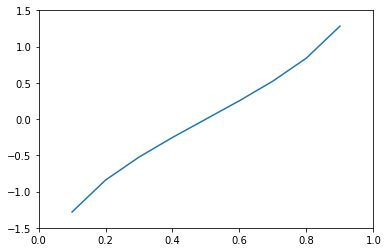

In [66]:
plt.plot(x,y)
plt.xlim(0,1)
plt.ylim(-1.5,1.5)

In [34]:
norm.cdf(1.28)

0.8997274320455579